# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8) # inicializar la función
wine_clusters = kmeans.fit(X) # alimentarla con la data
y_pred = wine_clusters.predict(X)

print(X.shape)
print(y.shape)
print("Model (n=8) Silhouette Score: {}".format(silhouette_score(X, y_pred)))

(178, 13)
(178,)
Model (n=8) Silhouette Score: 0.5406824747857625


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [23]:
wine_clusters_5 = KMeans(n_clusters=5).fit(X) # alimentarla con la data
y_pred_5 = wine_clusters_5.predict(X)
print("Model (n=5) Silhouette Score: {}".format(silhouette_score(X, y_pred_5)))

Model (n=5) Silhouette Score: 0.548999323979569


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [24]:
wine_clusters_3 = KMeans(n_clusters=3).fit(X) # alimentarla con la data
y_pred_3 = wine_clusters_3.predict(X)
print("Model (n=3) Silhouette Score: {}".format(silhouette_score(X, y_pred_3)))

Model (n=3) Silhouette Score: 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

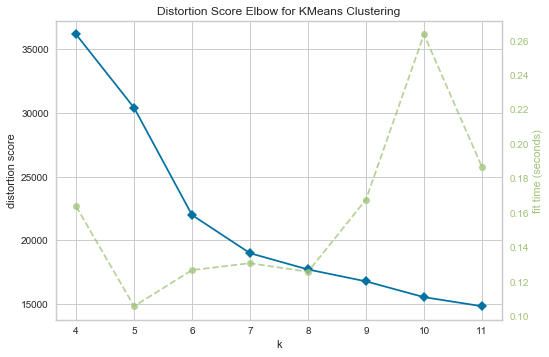

Model (n=6) Silhouette Score: 0.5656413100386389


In [25]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12)) # toma como input el modelo 
visualizer.fit(X)
visualizer.poof()

# al parecer el número óptimo de clústers es 6
wine_clusters_6 = KMeans(n_clusters=6).fit(X) # alimentarla con la data
y_pred_6 = wine_clusters_6.predict(X)
print("Model (n=6) Silhouette Score: {}".format(silhouette_score(X, y_pred_6)))

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

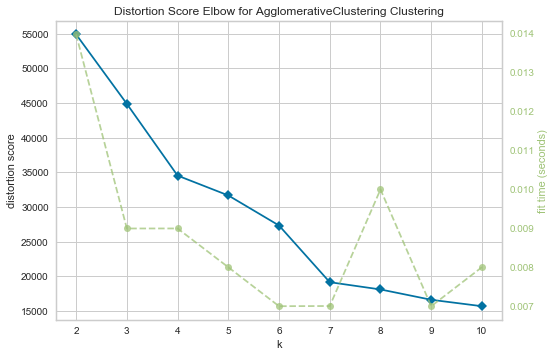

In [26]:
from sklearn.cluster import AgglomerativeClustering

visualizer = KElbowVisualizer(AgglomerativeClustering())
visualizer.fit(X)
visualizer.poof()

In [18]:
hier_clust = AgglomerativeClustering(n_clusters=6, linkage='single') # inicializar la función
wine_hier = hier_clust.fit(X) # hacerle fit a la función, que toma como input la muestra
y_pred_agg = wine_hier.labels_.astype(np.int)

print('_________________________________________')

print("Model (n=6) Agglomerative Clustering Silhouette Score: {}".format(silhouette_score(X, y_pred_agg)))

_________________________________________
Model (n=6) Agglomerative Clustering Silhouette Score: 0.28405280556794815


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


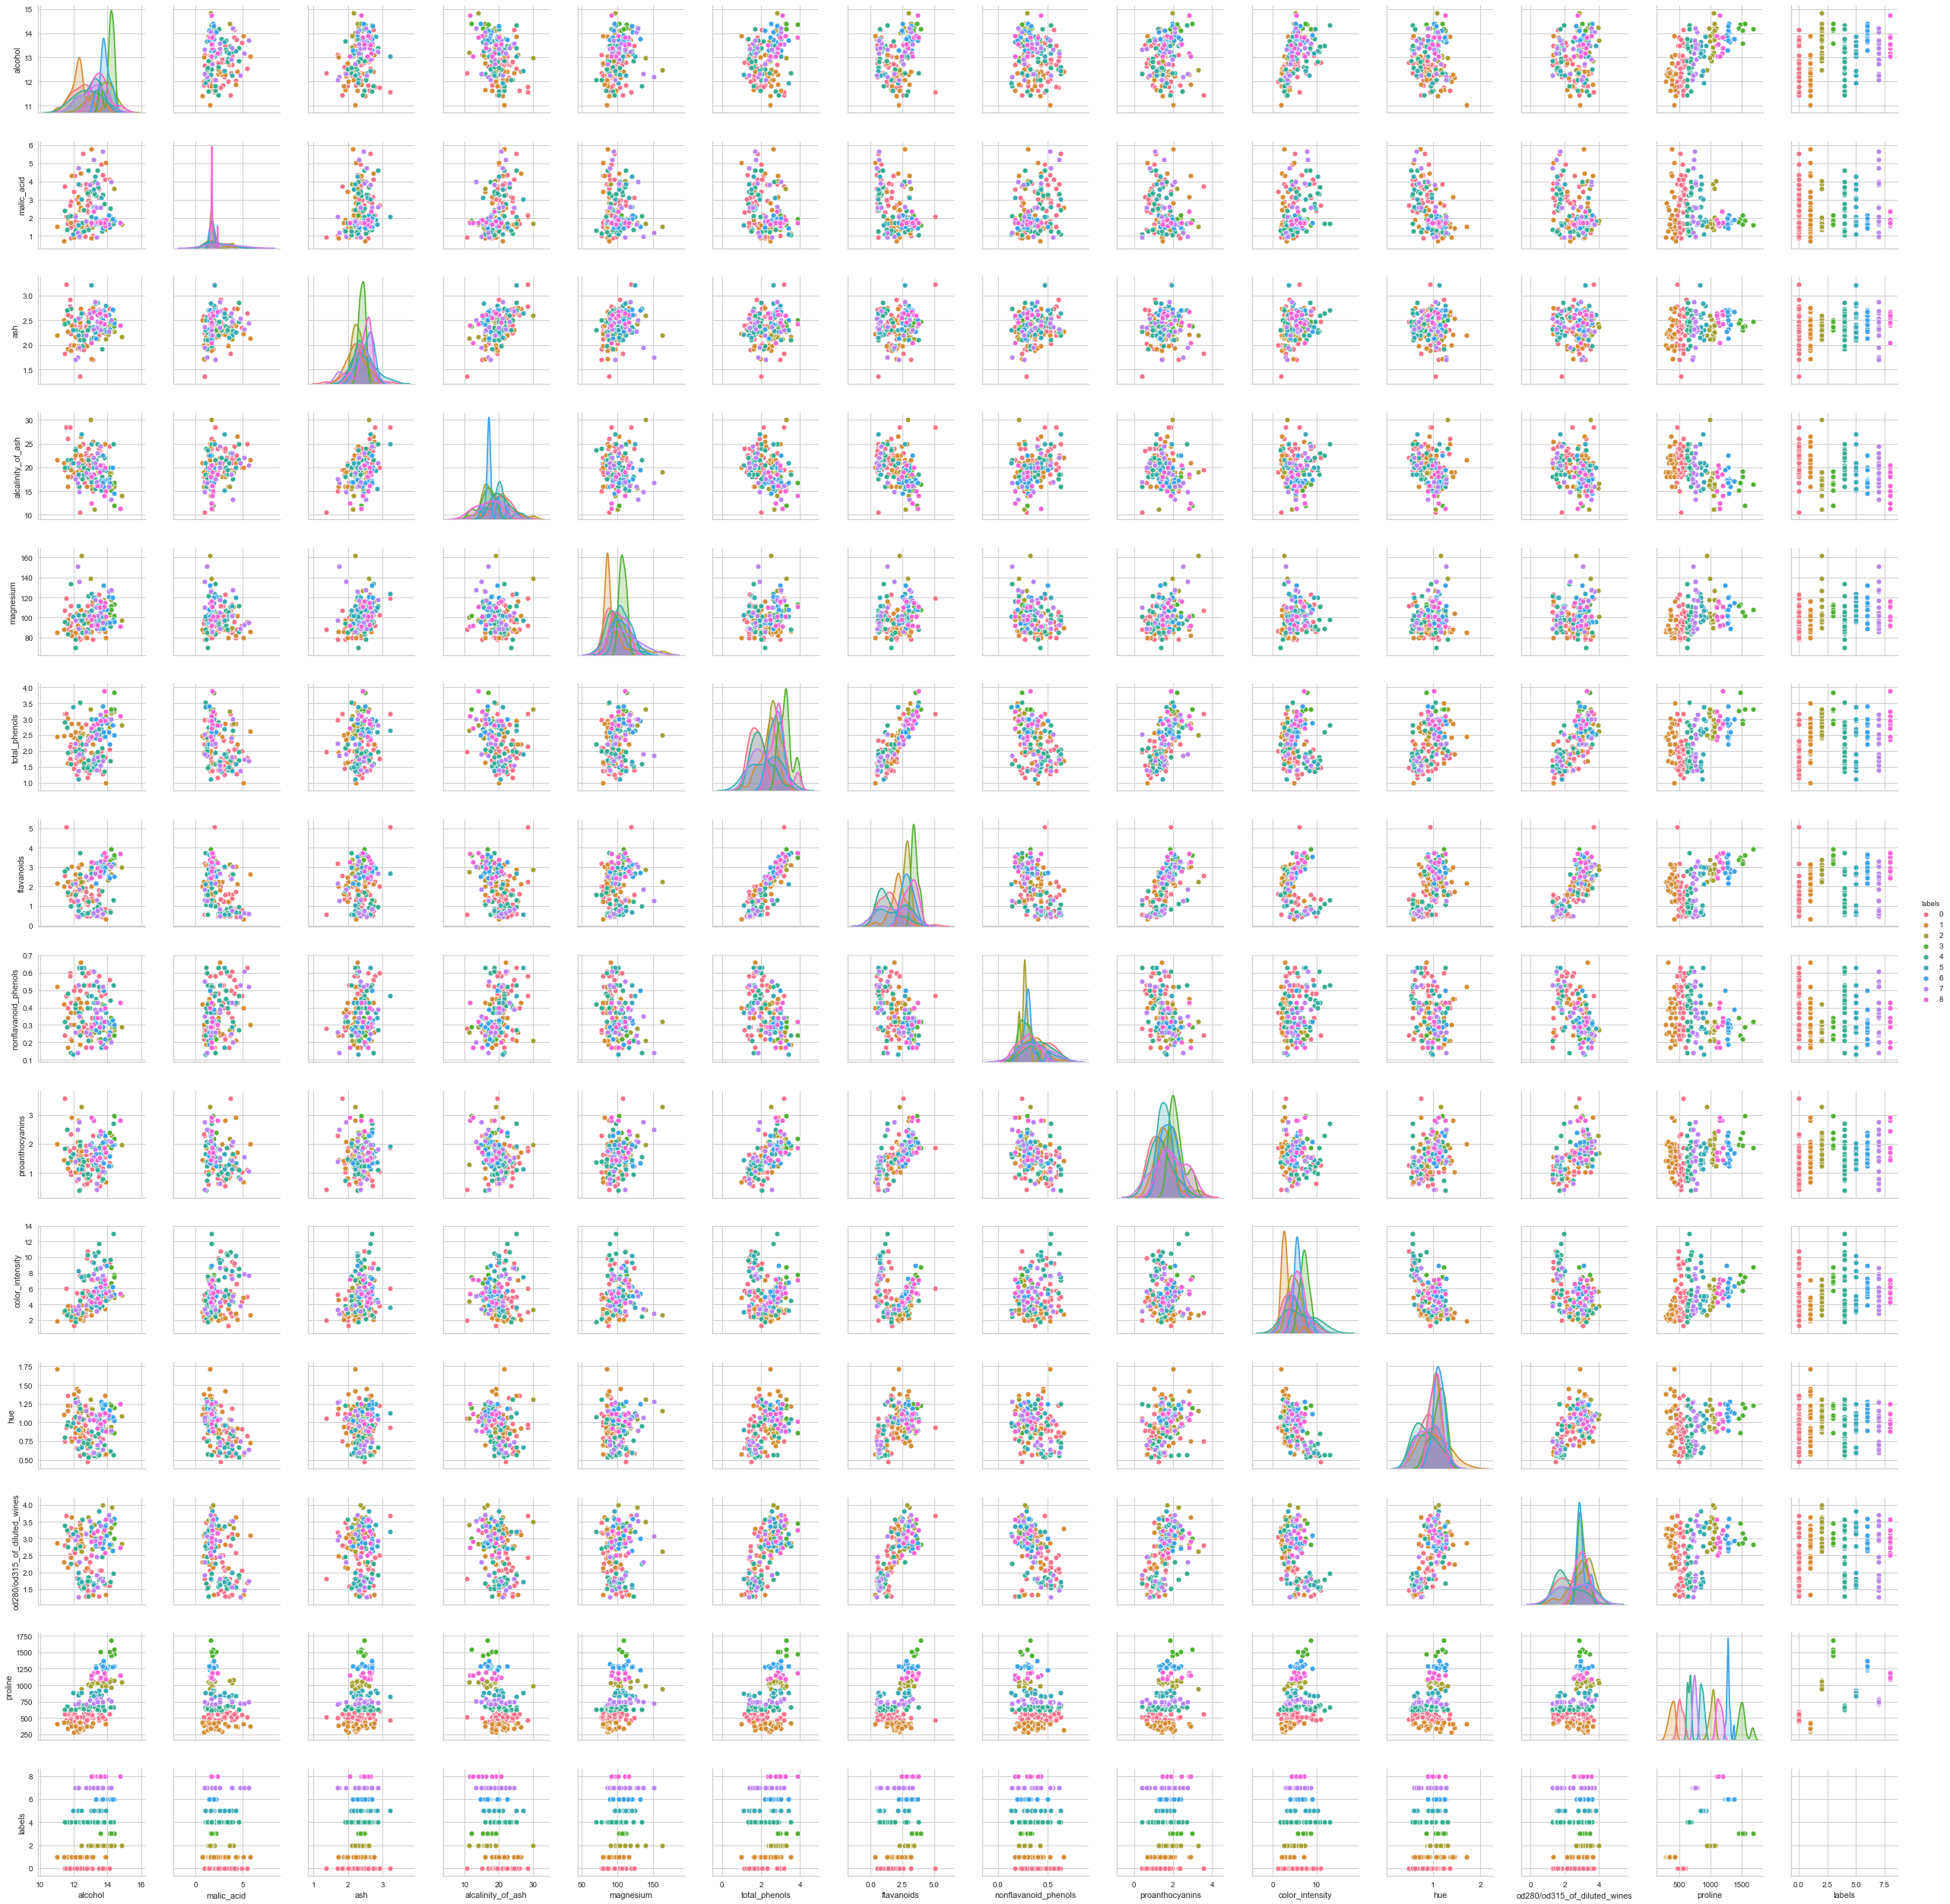

In [29]:
ac_c = AgglomerativeClustering(n_clusters=9)
ac_c.fit(X);
X['labels'] = ac_c.labels_
sns.pairplot(X, hue='labels');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [30]:
from sklearn.decomposition import PCA

pca = PCA().fit(X.drop(columns='labels'))
X_pca = pca.transform(X.drop(columns='labels'))
X_pca

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

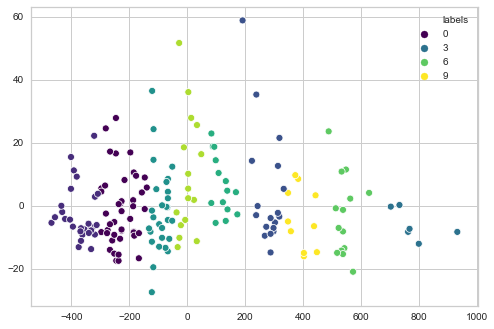

In [33]:
# Nueve clústers, dos componentes principales
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['labels'], palette='viridis');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

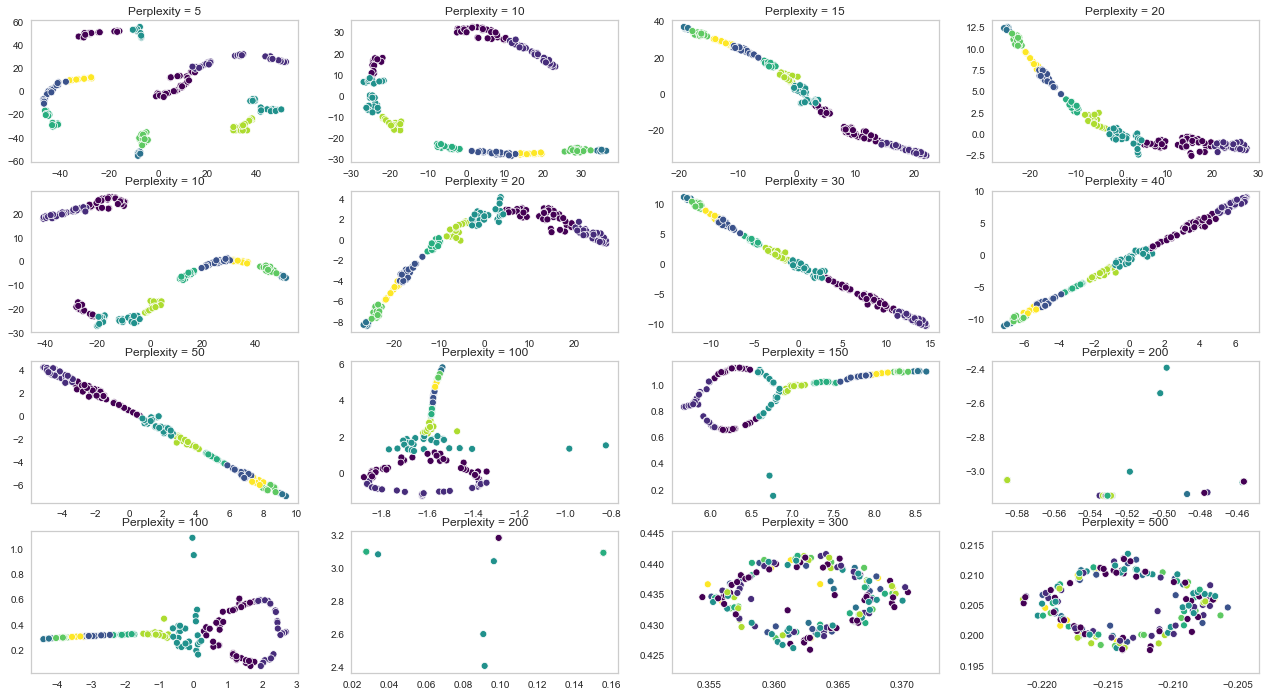

In [35]:
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = (22,12)
fig, axes = plt.subplots(4,4)

per = [[5,10,15,20],[10,20,30,40],[50,100,150,200],[100,200,300,500]]

for i in range(4):
    for j in range(4):
        p = per[i][j]
        tsne = TSNE(perplexity=p)
        X_tsne = tsne.fit_transform(X_pca)
        sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=X.labels, palette='viridis', ax=axes[i,j], legend=False)
        axes[i,j].set_title(f'Perplexity = {p}')
        axes[i,j].grid(False)

plt.show();